In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [96]:
cleaned=pd.read_csv('2014_cleaned.csv')

In [67]:
for i in cleaned.columns:
    if not i.startswith('bach'):
        print(i)

id
name
city
state
zip
region_id
ownership
online_only
open_admissions_policy
1_yr_repay.overall_rate
6_yrs_AE.WNE.mean_earnings
tuition.in_state
tuition.out_of_state
tuition_revenue_per_fte
instructional_expenditure_per_fte
faculty_salary
pell_grant_rate
compl_rate_4yr_150nt
share_first.time_full.time
retention_rate.four_year.full_time
3_yr_default_rate
t_iv.withdrawn_by.3yrs
median_debt.overall


In [68]:
#how does the tuition differ between regions?
cleaned.groupby('region_id')['tuition.out_of_state'].mean()

region_id
1    31291.878665
2    28201.515685
3    25165.573145
4    21348.421468
5    21086.650934
6    19660.662373
7    19462.348169
8    26127.426527
9     5843.878788
Name: tuition.out_of_state, dtype: float64

,name,instructional_expenditure_per_fte
1802,Strayer University-Global Region,640.0
1603,Caribbean University-Carolina,689.0
1639,Caribbean University-Ponce,737.0
983,Excelsior College,813.0
838,Beth Medrash Govoha,823.0
483,Ottawa University-Kansas City,989.0
1640,Caribbean University-Vega Baja,1011.0
1636,Kaplan University-Davenport Campus,1136.0
1721,Colorado Technical University-Online,1148.0
1803,Johnson & Wales University-Online,1381.0


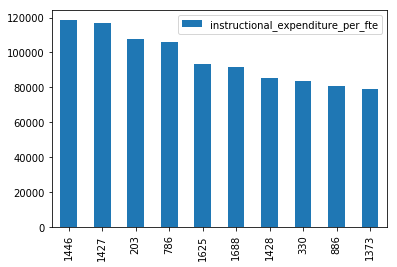

In [69]:
#what schools spend the most on students?
cleaned[['name','instructional_expenditure_per_fte']].sort_values(
    by="instructional_expenditure_per_fte",ascending=False).head(10).plot(kind='bar')
#what schools spend the least?
cleaned[['name','instructional_expenditure_per_fte']].sort_values(
    by="instructional_expenditure_per_fte").head(10)


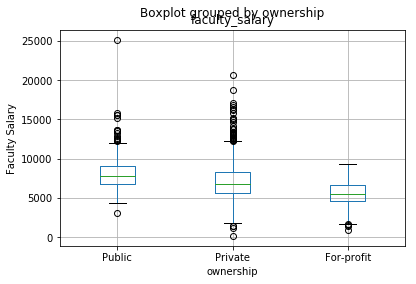

In [95]:
# How much are teachers paid? What kind of school is more profitable to work at?
cleaned.boxplot(column='faculty_salary', by='ownership')
plt.xticks(np.arange(start=1,stop=4), ('Public', 'Private', 'For-profit'))
plt.ylabel('Faculty Salary')
plt.show()

On average, publicly-owned colleges pay their faculty more than privately-owned colleges do, while for-profit colleges pay their faculty the least.

In [71]:
cleaned.iloc[:,47:].corr()

,1_yr_repay.overall_rate,6_yrs_AE.WNE.mean_earnings,tuition.in_state,tuition.out_of_state,tuition_revenue_per_fte,instructional_expenditure_per_fte,faculty_salary,pell_grant_rate,compl_rate_4yr_150nt,share_first.time_full.time,retention_rate.four_year.full_time,3_yr_default_rate,t_iv.withdrawn_by.3yrs,median_debt.overall
1_yr_repay.overall_rate,1.000000,0.535206,0.478300,0.633445,0.330372,0.439927,0.557135,-0.792696,0.780463,0.549538,0.571802,-0.794617,-0.726844,0.473184
6_yrs_AE.WNE.mean_earnings,0.535206,1.000000,0.321320,0.427925,0.414242,0.508515,0.594776,-0.550201,0.516431,0.070978,0.195829,-0.578091,-0.327101,0.283696
tuition.in_state,0.478300,0.321320,1.000000,0.891654,0.764888,0.325640,0.332335,-0.459587,0.548982,0.432146,0.344530,-0.442256,-0.415534,0.563470
tuition.out_of_state,0.633445,0.427925,0.891654,1.000000,0.692427,0.439493,0.579985,-0.623202,0.695325,0.538685,0.505567,-0.572688,-0.574558,0.602202
tuition_revenue_per_fte,0.330372,0.414242,0.764888,0.692427,1.000000,0.385403,0.346361,-0.373936,0.485641,0.233811,0.205126,-0.352266,-0.234711,0.480921
instructional_expenditure_per_fte,0.439927,0.508515,0.325640,0.439493,0.385403,1.000000,0.532540,-0.390131,0.505527,0.339620,0.202276,-0.362633,-0.331223,0.161660
faculty_salary,0.557135,0.594776,0.332335,0.579985,0.346361,0.532540,1.000000,-0.557318,0.607024,0.363342,0.465709,-0.517939,-0.480287,0.302129
pell_grant_rate,-0.792696,-0.550201,-0.459587,-0.623202,-0.373936,-0.390131,-0.557318,1.000000,-0.680401,-0.400269,-0.511281,0.720000,0.564620,-0.414527
compl_rate_4yr_150nt,0.780463,0.516431,0.548982,0.695325,0.485641,0.505527,0.607024,-0.680401,1.000000,0.512646,0.574748,-0.696386,-0.685002,0.541133
share_first.time_full.time,0.549538,0.070978,0.432146,0.538685,0.233811,0.339620,0.363342,-0.400269,0.512646,1.000000,0.478656,-0.274377,-0.600658,0.390162


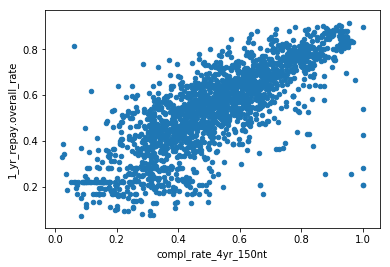

In [73]:
cleaned.plot(kind='scatter', x='compl_rate_4yr_150nt', y='1_yr_repay.overall_rate')


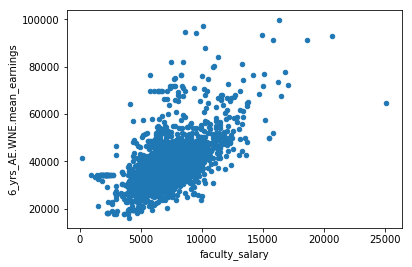

In [74]:
cleaned.plot(kind='scatter', x='faculty_salary', y='6_yrs_AE.WNE.mean_earnings')


(array([ 35., 111., 168., 285., 348., 316., 268., 165., 110.,  59.]),
 array([0.0235 , 0.12115, 0.2188 , 0.31645, 0.4141 , 0.51175, 0.6094 ,
        0.70705, 0.8047 , 0.90235, 1.     ]),
 <a list of 10 Patch objects>)

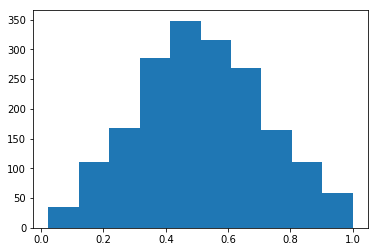

In [99]:
plt.hist(cleaned['compl_rate_4yr_150nt'].dropna())

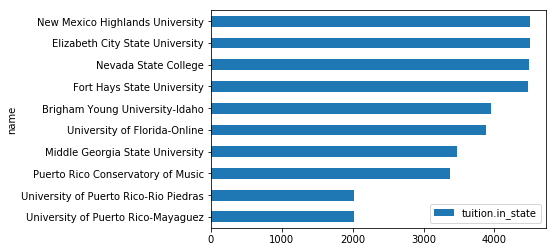

In [129]:
#what schools cost the least?
cleaned[['name','tuition.in_state']].sort_values(
    by="tuition.in_state").head(10).set_index('name').plot(kind='barh')

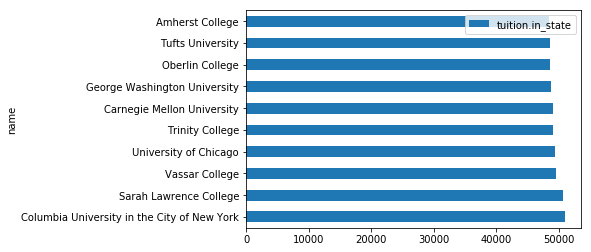

In [125]:
#what schools cost the most?
cleaned[['name','tuition.in_state']].sort_values(
    by="tuition.in_state",ascending=False).head(10).set_index('name').plot(kind='barh')

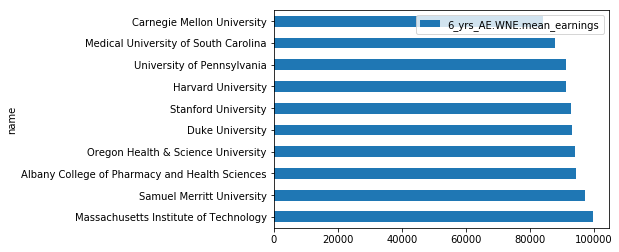

In [118]:
#what schools have the highest post-grad earnings?
cleaned[['name','6_yrs_AE.WNE.mean_earnings']].sort_values(
    by="6_yrs_AE.WNE.mean_earnings",ascending=False).head(10).set_index('name').plot(kind='barh')

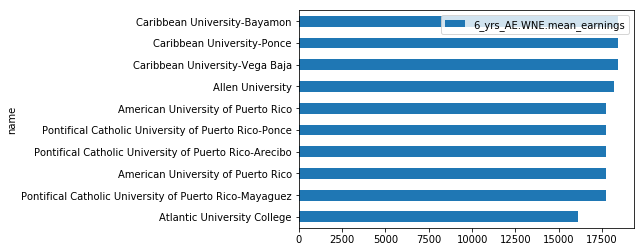

In [119]:
cleaned[['name','6_yrs_AE.WNE.mean_earnings']].sort_values(
    by="6_yrs_AE.WNE.mean_earnings").head(10).set_index('name').plot(kind='barh')